<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Logistic_Regression_Classifier_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression Classifier

##Supervised Machine Learning
This is the first of the **supervised** machine learning algorithms that we will introduce in this class. Recall from week 2 that while exploratory data analysis (EDA) can be done using unsupervised machine learning method like PCA and KMeans clustering (week 3), if we are to test hypothesis or model data that we know something about, then we should use supervised machine learning. 

If we know something about data, it is because the data has been labeleled beforehand. This labeling could have been done automatically. Think for example of meteorological data. Sensors populate the datasets that can then be used to populate large datasets (the story is more complicated and if you want to know more, you can read [this book](http://pne.people.si.umich.edu/vastmachine/index.html)). Other times, the data has to be labeled manually. Someone, sometimes an expert, sometimes a trained coder, at times an MTurker will "code" each row of the data to label it based on a particular research question or characterstic of the data itself (usually a combination of both). For example, if we had a dataset from an online site and you want to code each of the rows for employment, then you can have a coder red through the content and make a decision as to how the current row is best categorized. Say we want to know which of the users have blue collar jobs and white collar jobs. Each of these will be called a **class**. So, we have two classes, white collar and blue collar. This distinction will be something we are looking for in our analysis. In other words, these are going to be our [dependent variables](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb7Y1wCgDiwGqZI9qijAzRXbxHnXAwjFPmZw&usqp=CAU). The independent variables are all those variables we will use in our analysis exluduing the classes (dependent variable). These are usually referred to as the **features**. In SkLearn datasets, the classes are labeled in the **target** while the rest of the data is in **data**.

##Training data and test data
When creating our supervised model, we need to have training data to "train" the model. Then we need to have test data to test how well the model we trained works - or if it works!

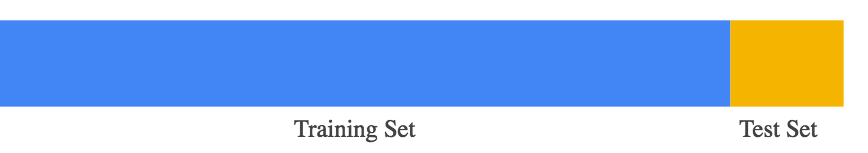

Sklearn has a really cool function that helps you do that easily:

```
#First import sklearn to get train_test_split
from sklearn.model_selection import train_test_split
#Now, we will divide the data into training and testing
x_train, x_test, y_train, y_test = 
train_test_split(x, y, train_size = 0.65, test_size=0.35, random_state=0) 
```
X should contain all the features; y should contain the class (target). Now you have x_train, and x_test. The "train_size" argument sets the size of the training data and "test_size" sets the size of the testing data. This means that they should both add up to 1.0 (basically adding the amount of data in training and testings should equal the complete data set). 


##Introducing Logistic Regression Classifiers
When "fitting"* the data to a logistic regression model,this is done using a function similar to a smoothed step function called a sigmoid function. Using the sigmoid function, φ(z)=1/1+e−z, each of the feature values is weighted and the results added up. The result is the input to the sigmoid function allowing us to get a result between [0,1]. Any value above 0.5 will be classified as class 1. Anything under 0.5 will be classified under class 0 [1].

*we will come back to this later

References:
[1] Peter Harrington. 2012.Machine Learning in Action. Manning Publications.   http://proquest.safaribooksonline.com/9781617290183

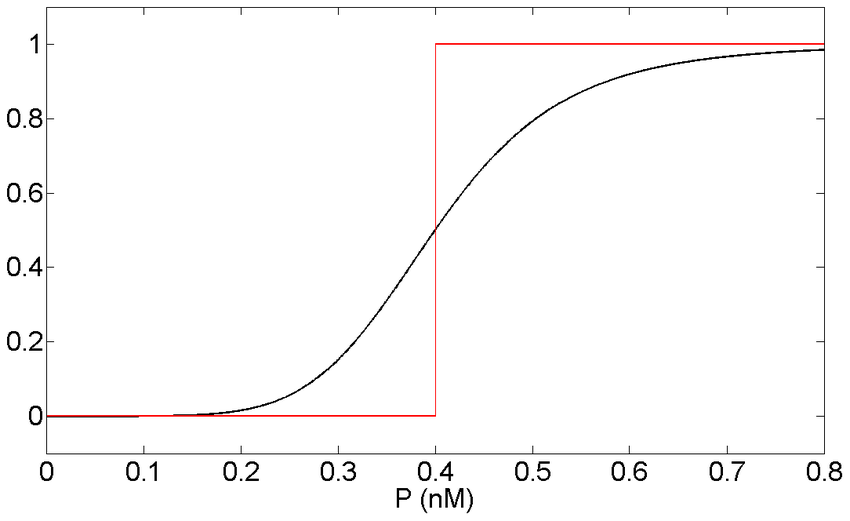

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/MachineLearning:17:610:564:90/Examples/Pictures/step_sigmoid.png")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

In [ ]:
#dataset originaly from: https://utkuufuk.com/2018/05/19/binary-logistic-regression/
#https://drive.google.com/file/d/1AAb8QqK5FCcziAAcslig1PqPFhimY1U9/view?usp=sharing
df = pd.read_csv('university_admission.csv')

In [ ]:
df.columns=['exam_1','exam_2','admit']

In [ ]:
df.head()

,exam_1,exam_2,admit
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


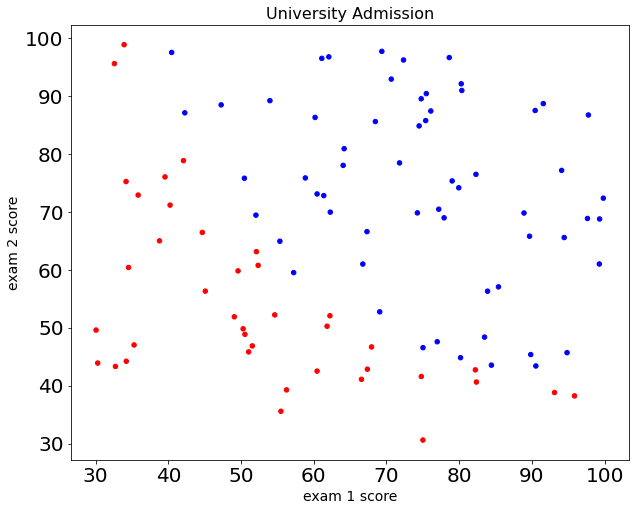

In [ ]:
col = df.admit.map({0.0:'r', 1.0:'b'})
ax = df.plot.scatter(x='exam_1',y='exam_2',c=col)
plt.title("University Admission", fontsize=16)
plt.xlabel("exam 1 score", fontsize=14)
plt.ylabel("exam 2 score", fontsize=14)
plt.show()

In [ ]:
#features
X = df[['exam_1','exam_2']]
#classes/target
y = df['admit']

In [ ]:
#let's take a look at the shape of X
#There are two features, and 99 records!
X.shape

(99, 2)

In [ ]:
#let's take a look at the shape of y
#There are 99 recordings so this makes sense
y.shape

(99,)

In [ ]:
# First import sklearn to get train_test_split
from sklearn.model_selection import train_test_split
# Now, we will divide the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=0) 

In [ ]:
#Now, let's take a look at how x_train looks like
#this is 70% of the dataset
x_train.shape

(69, 2)

In [ ]:
#Now the test data should contain the rest, so 30 records
#let's check
x_test.shape

(30, 2)

In [ ]:
#OK. let's pop the hood for y_train
#we should expect it to be (69,)
y_train.shape

(69,)

In [ ]:
#Similarly, y_test should be (30,)
y_test.shape

(30,)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
# we will be changing the parameters going forward
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#now the predictions are in y_pred
y_pred=logreg.predict(x_test)

In [ ]:
#since y_pred (prediction) is built using the 
#y_test data, then the shape of this dataset
#should also be (30,)
y_pred.shape

(30,)

##Evaluating our logistic regression model

A confusion matrix is a table that is used to evaluate the performance of a classification model. 

There are four metrics presented in the confusion matrix, thus, a 2X2 box is created when we have a binary classification - as in there are two classes (our case).You have two classes 0 (rejected) and 1 (admitted). 

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 9 and 17 are actual predictions, and 2 and 2 are incorrect predictions. 

The evaluation metrics are: <br><br>
**Accuracy**: When a model makes a prediction, this metric represents the fraction of predictions our model got right. Our model got 87% of its predictions right.

**Precision**: When a model makes a prediction, how often it is correct. In our case, when our logistic regression predicted students will be admitted, they were actually admitted 89% of the time. 

**Recall**: If a student was actually admitted, our model will catch that 89% of the time.

**F1 score**: This is a weighted score that takes both precision and recall into account. 
F1 Score = 2*(Recall * Precision) / (Recall + Precision). Our model has an F1 score of F1 Score = 2*(Recall * Precision) / (Recall + Precision). The F1 score for our model is 0.89. "Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution." [2]

References:

[2] https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/


In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 9,  2],
       [ 2, 17]])

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
#this is a different plotting package
import seaborn as sns
%matplotlib inline

When using a classifier and predicting values, say the results of a diagnostic test, there are four ways of thinking about the results:

1.   **True Positives**: we predict a positive result and the patient actually *has* the disease 
2.   **False Positives**: we predict a positive result while the patient *does not have* the disease
3.   **True Negatives**: we predict a negative result and the patient *does not have* the disease 
4.   **False Negatives**: we predict a negative result while the patient *has* the disease

Generally, you want more of 1 and 3, but are you focused more on 1 or 3? Basically, how conservative do you want to be in your estimates? Presumably, with something like say COVID, we might be OK with a few more False Positives (2) if we capture as much as possible of the patients with COVID (1). We will get back to this again and again in the next three weeks. 

The distribution of all 4 is called the confusion matrix. 



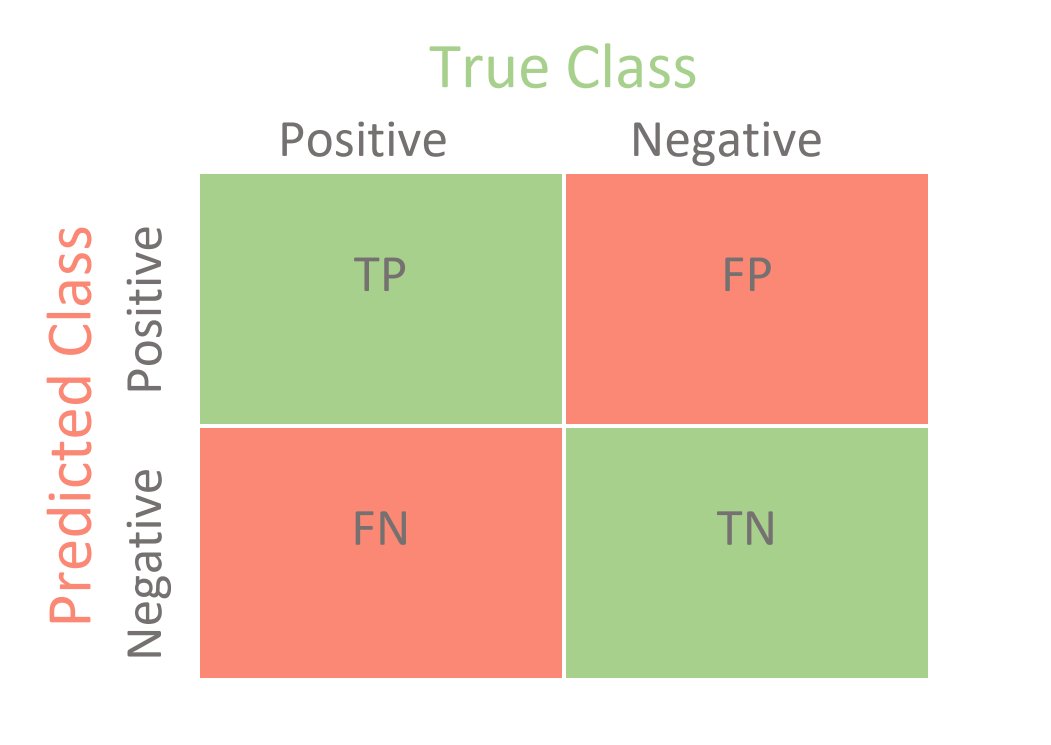

Text(0.5, 257.44, 'Predicted label')

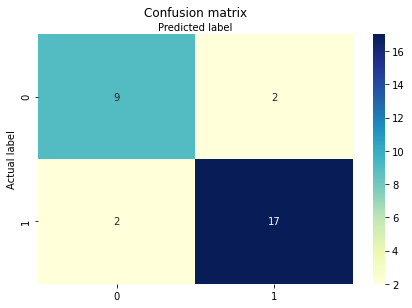

In [ ]:
#source: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We use the values of the confusion matrix to calculate metrics for each classifier that basically tell us how well/or how badly a classifier works. 

**Accuracy** = Number of correct predictions/total number of predictions

**Precision** = What proportion of positive identifications was actually correct? This is the true positives (TP)/true positives (TP) + false positives (FP)

**Recall** = What proportion of actual positives was identified correctly? This is the total positives (TP)/True Positives (TP) + True Negatives (TN)

**F1 Score** = 2* precisionXrecall/precision + recall 
F1 becoemes really important when the cots of False Positives or False Negatives (see the Example of the medical exam above). Another area where this metric is important is when a dataset is imbalanced. What if one class only constitutes 10% of the class. This score makes Precision and Recall equally important. 

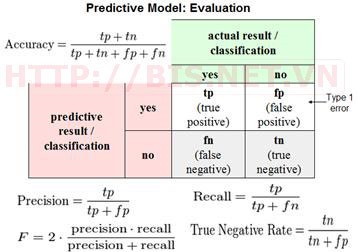

In [ ]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='binary'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='binary'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='binary'))))

Accuracy:      0.8666666666666667  
Precision:     0.8947368421052632  
Recall:        0.8947368421052632  
f1 score:0.8947368421052632  


The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is recall. The false positive rate is the number of false positive of the overall number of predictions (FP/FP + TN). [1]

"An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve." [2]

References:

[1] https://en.wikipedia.org/wiki/Receiver_operating_characteristic

[2] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc


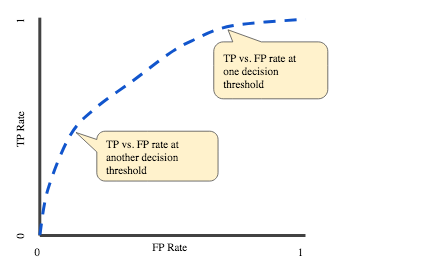

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is an important measure to compare different classifiers.

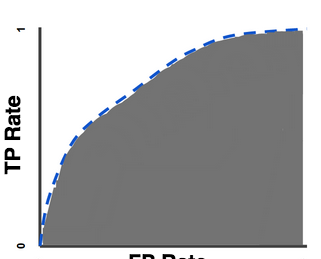

Now, let's take a look at the ROC AUC for our model

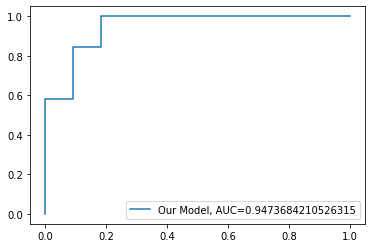

In [ ]:
#source: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Our Model, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.95. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

##Interpreting the model

[array([0.22663105, 0.20183648])]

2

Index(['Features', 'Coefficients'], dtype='object')

,Features,Coefficients
0,exam_1,0.226631
1,exam_2,0.201836


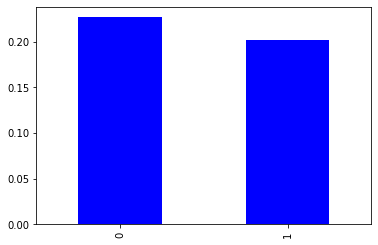

In [ ]:
# Access the coefficients from classifier
coef = logreg.coef_
coefficients = list(coef.flatten())
display(list(coef))
# Access the classes
classes = logreg.classes_
display(len(classes))

Features = ['exam_1','exam_2']

#building a dataframe
coef_dict= {'Features':Features,'Coefficients':coefficients}
df = pd.DataFrame(coef_dict)
display(df.columns)
display(df.head())

#for col in df.columns:
df['Coefficients'].plot(kind='bar', color=(df['Coefficients'] > 0).map({True: 'b', False: 'r'}))


#pt.set_title(col)

##Advantages and disadvantages of the Logsitic Regression Classifier

###Advantages
1.   Does not require high computational power
2.   Easy to interpret and implement

###Disadvantages
1.   Difficult to handle large number of features (there are ways around this like regularization) 


